In [11]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
df = pd.read_csv('../num-queries-vs-duration.csv', sep=';')

In [33]:
df

,Dataset,Classifier,Num queries,Durations,Precision,Recall
0,MEDLINE,Baseline,67870,18254,0.9294,0.8907
1,ANI,Baseline,59963,18089,0.9275,0.8905
2,ANI SUPP,Baseline,32114,10794,0.9156,0.8685
3,ANI CEC,Baseline,64561,20492,0.9149,0.8634
4,GRANTS,Baseline,10595,8491,0.9217,0.7001
5,MEDLINE,Expanded subject,67854,17885,NaN,NaN
6,ANI,Expanded subject,59962,19161,NaN,NaN
7,ANI SUPP,Expanded subject,32110,10589,NaN,NaN
8,ANI CEC,Expanded subject,64519,26113,NaN,NaN
9,GRANTS,Expanded subject,15513,16562,NaN,NaN


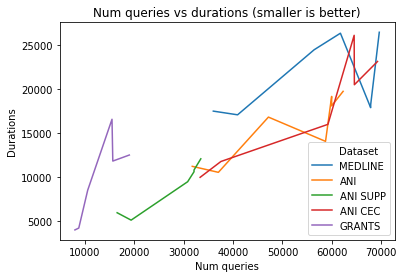

In [13]:
sns.lineplot(x='Num queries', y='Durations', hue='Dataset', data=df)
plt.title('Num queries vs durations (smaller is better)')
None

In [34]:
df[df.Dataset == 'MEDLINE']

,Dataset,Classifier,Num queries,Durations,Precision,Recall
0,MEDLINE,Baseline,67870,18254,0.9294,0.8907
5,MEDLINE,Expanded subject,67854,17885,NaN,NaN
10,MEDLINE,Gold standard,56417,24469,NaN,NaN
12,MEDLINE,Hybrid Classifier,61739,26354,NaN,NaN
17,MEDLINE,Hybrid Classifier - Linear Weighted,36015,17488,0.9296,0.8884
22,MEDLINE,Hybrid Classifier - Monolingual,40927,17069,NaN,NaN
27,MEDLINE,Minh ver1,69603,26464,NaN,NaN


In [35]:
df2 = df.set_index(['Classifier', 'Dataset'])
comparison_df = (df2.loc['Hybrid Classifier - Linear Weighted'] - df2.loc['Baseline']) / df2.loc['Baseline']

In [36]:
comparison_df

,Num queries,Durations,Precision,Recall
Dataset,,,,
MEDLINE,-0.469353,-0.041963,0.000215,-0.002582
ANI,-0.470390,-0.380507,0.001617,-0.002358
ANI SUPP,-0.484586,-0.450991,-0.002075,-0.007484
ANI CEC,-0.483465,-0.514152,0.000219,-0.000811
GRANTS,-0.244266,-0.532328,-0.000651,-0.002143


In [38]:
comparison_df.describe()

,Num queries,Durations,Precision,Recall
count,5.000000,5.000000,5.000000,5.000000
mean,-0.430412,-0.383988,-0.000135,-0.003076
std,0.104301,0.200268,0.001355,0.002559
min,-0.484586,-0.532328,-0.002075,-0.007484
25%,-0.483465,-0.514152,-0.000651,-0.002582
50%,-0.470390,-0.450991,0.000215,-0.002358
75%,-0.469353,-0.380507,0.000219,-0.002143
max,-0.244266,-0.041963,0.001617,-0.000811


In [37]:
df.groupby('Classifier').count()

,Dataset,Num queries,Durations,Precision,Recall
Classifier,,,,,
Baseline,5,5,5,5,5
Expanded subject,5,5,5,0,0
Gold standard,2,2,2,0,0
Hybrid Classifier,5,5,5,0,0
Hybrid Classifier - Linear Weighted,5,5,5,5,5
Hybrid Classifier - Monolingual,5,5,5,0,0
Minh ver1,5,5,5,0,0
